# 邏輯回歸 Logistic Regression

## 分類問題

上一個部分講的回歸問題，適合用來處理連續的數值問題(線性)，例如：這個人薪資為多少、明日氣溫為多少等
- 應變量為可相比較(大小)的數值

這一部份講的分類問題，適合用來處理將資料劃分、切割、做分類，例如：會購買or不會購買
- 應變量為不可相比較的類別

### Sigmoid Function
1. 簡單線性回歸模型無法表達這樣的分類問題(0 or 1)
2. 把Sigmoid方程，帶入到直線方程，就會得到一個平滑的曲線
3. 這個新的方程能讓y的值控制在0~1之間
![sigmoid](sigmoid.png)

4. 將x的值投射到這條曲線上，會得到相對的y的值
5. 也就能得到0~1之間的機率，稱為"p_hat"
6. 設一個閥值即能夠將資料分為兩類，例如y_hat>0.5 -> 等於1)，y_hat<0.5 -> 等於0
![p_hat](p_hat.png)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 目標
- "Social_Network_Ads"這個Dataset中紀錄了400筆社群網路的用戶之個人基礎資料，以及觀看廣告後，是否購買了SUV車
- 我們以受訪者的年齡以及估計薪資來預測此人是否會購買SUV車
- 好讓車商行銷團隊更精準地把廣告投放給最有可能購買車的人

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [24]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


將其中300筆做為訓練集、100筆做為測試集

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 特徵縮放
- 把訓練集和測試集的資料特徵縮放成標準的分佈
- 這裡只需要對X值進行特徵縮放，因為邏輯回歸y的值不是0就是1

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 分類器
邏輯回歸分類器是線性的分類器；在二維的數據空間，不同類的分界線是一條直線

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # 其他參數值都預設即可
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1])

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1])

## 混淆矩陣
- 通過測試的結果來評估這個分類器的性能
- 第一個參數輸入"真實結果"、第二個參數輸入"預測結果"
- 以下方為例，正確結果是89組，錯誤結果是11組，可以說正確率是89%

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [8]:
cm

array([[65,  3],
       [ 8, 24]])

- 把平面上每點都標上分類器預測的分類顏色，就可以看到明顯的分類邊界(一條直線)
- 並把數據集的訓練資料/測試資料標上分類器預測的分類顏色，就可以看出分類預測結果與實際結果的差異，進而評估分類器的效果

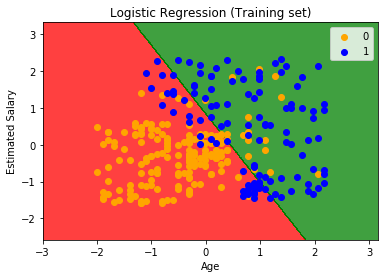

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

結果來看，年齡較高&薪資較低的用戶，和年齡較低&薪資較高的用戶，在線性的分類器上會有大量的預測錯誤

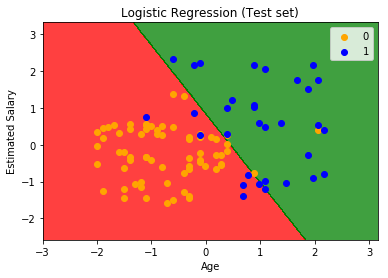

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()